In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv(r'./student_scores.csv')

In [3]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
x_points = dataset['Hours'].to_numpy()
y_points = dataset['Scores'].to_numpy()

In [5]:
x_points.shape

(25,)

In [6]:
epsilon = 1e-7
learning_rates = [0.001,0.005,0.01]
lri = 0.05 

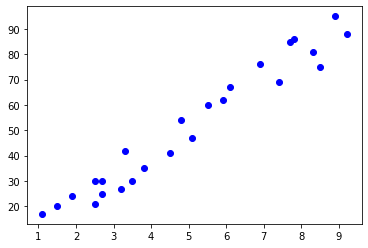

In [7]:
plt.plot(x_points, y_points, 'bo')

In [8]:
np.random.seed(0)

In [9]:
wn = np.random.randn()#value wont fluctuate more 
bn = np.random.randn()

In [10]:
def linear_model(x,w,b):
    y_h = x*w + b
    return y_h

In [11]:
def loss_fun(x, w, b):
    y_h = linear_model(x, w, b)
    n = len(y_h)
    err = (1/(2*n))*np.dot((y_h - y_points).T, (y_h - y_points))
    return err

In [13]:
def differentiation_1st_principle(x_points, w, b):
    y_h1 = loss_fun(x_points, w+epsilon, b)
    y_h2 = loss_fun(x_points, w, b)
    gradient = (y_h1 - y_h2)/epsilon
    y_h1 = loss_fun(x_points, w, b+epsilon)
    y_h2 = loss_fun(x_points, w, b)
    gradient2 = (y_h1 - y_h2)/epsilon
    t1 = (gradient, gradient2)
    return t1

In [14]:
def change_wb(x_points, w, b,learning_rate):
    dw,db = differentiation_1st_principle(x_points, w, b)
    w = w - learning_rate*dw
    b = b - learning_rate*db
    return w,b

In [15]:
wsn = [wn]
lsn = [loss_fun(x_points,wn,bn)]
for i in range(50):
    wn,bn = change_wb(x_points, wn, bn,lri)
    y = linear_model(x_points,wn,bn)
    loss = loss_fun(x_points,wn,bn)
    wsn.append(wn)
    lsn.append(loss)

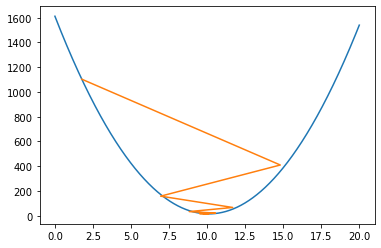

In [16]:
plt.plot(ws,ls)
plt.plot(wsn,lsn)

In [17]:
lrs = []
for lr in learning_rates:
    w = np.random.randn()
    b = np.random.randn()
    errors = [loss_fun(x_points,w,b)]
    for i in range(50):
        w,b = change_wb(x_points, w, b,lr)
        y = linear_model(x_points,w,b)
        loss = loss_fun(x_points,w,b)
        errors.append(loss)
    lrs.append(errors)

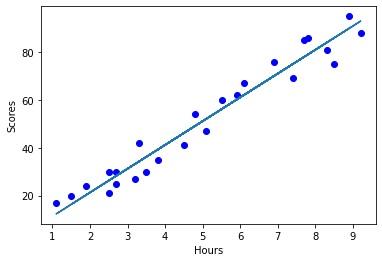

In [22]:
plt.plot(x_points,y_points,'bo')#make points otherwise won't get output as discrete
plt.plot(x_points,y)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

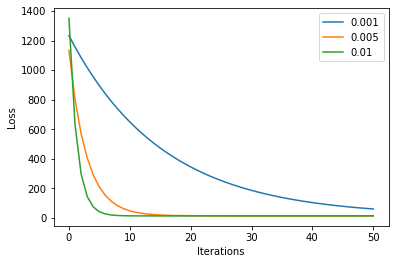

In [18]:
for er in lrs:
    plt.plot(er)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend(["0.001","0.005","0.01"])
plt.show()